# 1. Baca Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('diabetes_fitur5.csv')
df

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,33.6,0.627,50,1
1,1,85,26.6,0.351,31,0
2,8,183,23.3,0.672,32,1
3,1,89,28.1,0.167,21,0
4,0,137,43.1,2.288,33,1
...,...,...,...,...,...,...
763,10,101,32.9,0.171,63,0
764,2,122,36.8,0.340,27,0
765,5,121,26.2,0.245,30,0
766,1,126,30.1,0.349,47,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BMI                       768 non-null    float64
 3   DiabetesPedigreeFunction  768 non-null    float64
 4   Age                       768 non-null    int64  
 5   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 36.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,67.100000,2.420000,81.000000,1.000000


# 2. Data Preprocessing

In [5]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [6]:
df.duplicated().sum()

0

In [7]:
outliers_count = {}

for column in df.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_count[column] = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()

outliers_count


{'Pregnancies': 4,
 'Glucose': 5,
 'BMI': 19,
 'DiabetesPedigreeFunction': 29,
 'Age': 9,
 'Outcome': 0}

In [8]:
#FITUR-FITUR numerik

list_numerik_features = ['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']

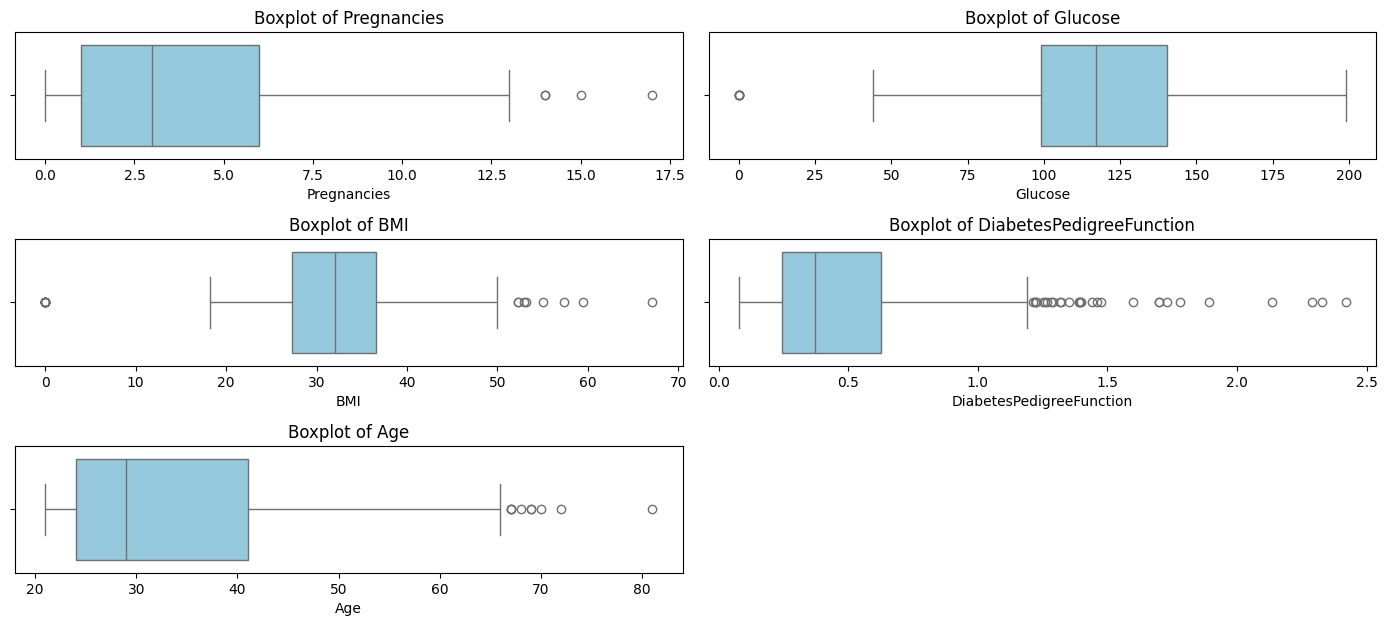

In [9]:
# Membuat boxplot untuk melihat outlier setiap fitur numerik
plt.figure(figsize=(14, 8))
for i, feature in enumerate(list_numerik_features):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(x=df[feature], color='skyblue')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

In [10]:
# handling outliers
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Menentukan batas bawah dan batas atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mengganti nilai outlier dengan nilai batas atas atau batas bawah terdekat
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

# Menggunakan fungsi handle_outliers_iqr untuk setiap kolom yang memiliki outlier
list_numerik_features
for column in list_numerik_features:
    handle_outliers_iqr(df, column)

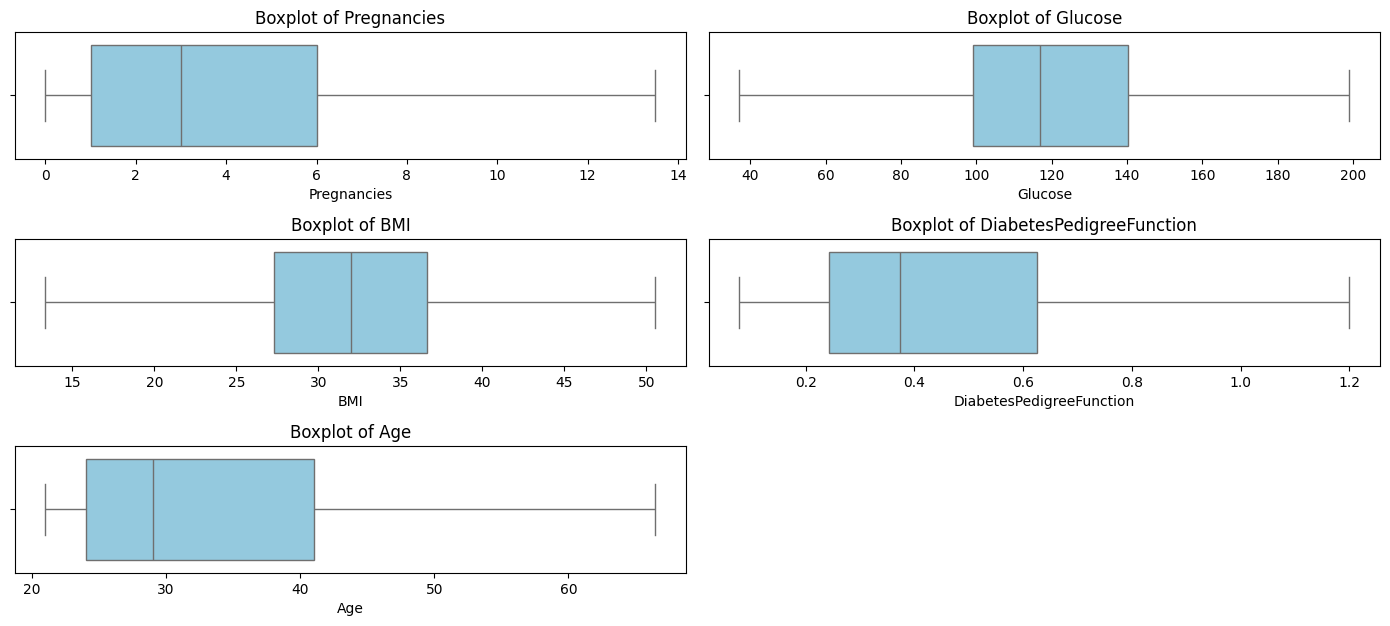

In [11]:
# Membuat boxplot untuk melihat outlier setiap fitur numerik
plt.figure(figsize=(14, 8))
for i, feature in enumerate(list_numerik_features):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(x=df[feature], color='skyblue')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

In [12]:
# menjulmlahkan nilai pada column target
df.Outcome.value_counts()

,count
Outcome,
0,500
1,268


<Axes: ylabel='count'>

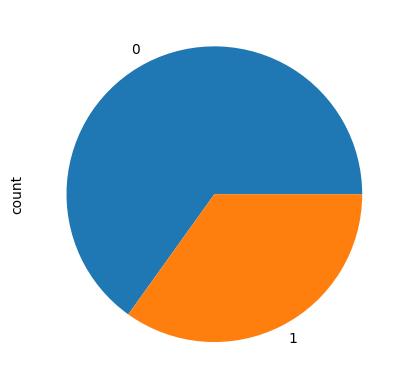

In [13]:
# memvisualkan menggunkan pie chart
df.Outcome.value_counts().plot(kind ='pie')

# 3. EDA

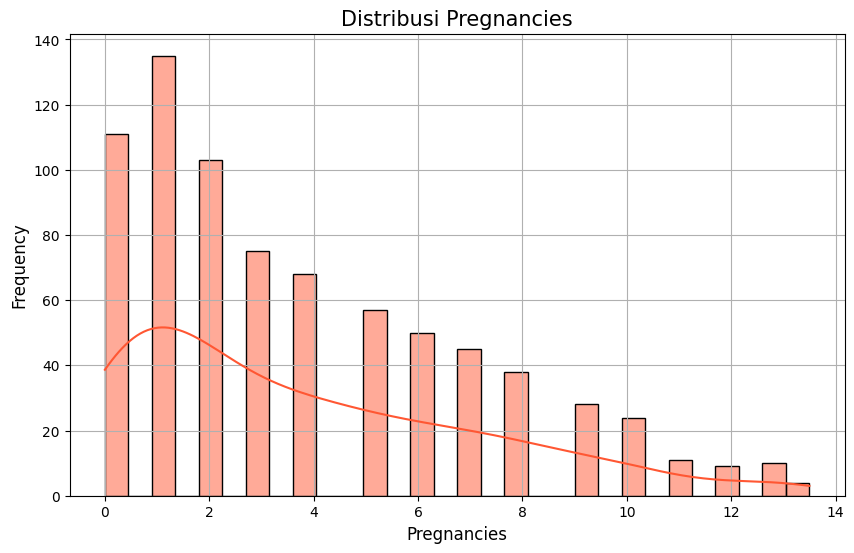

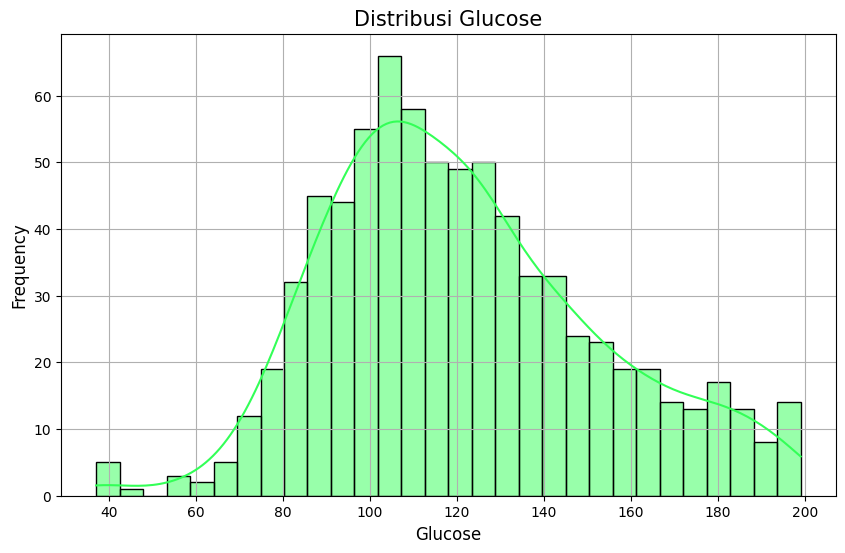

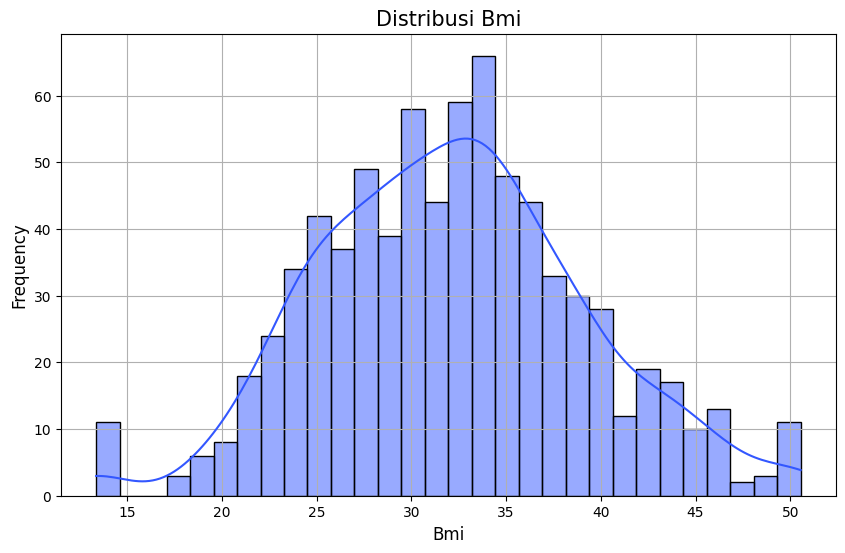

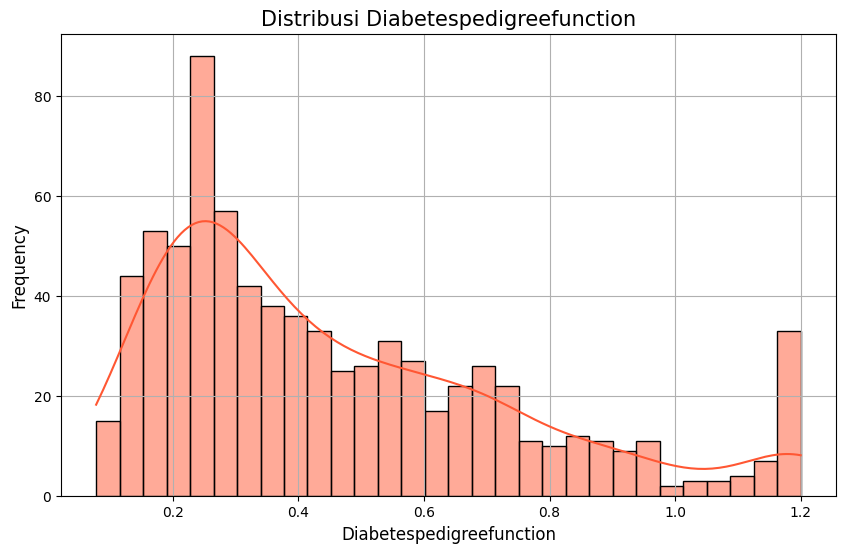

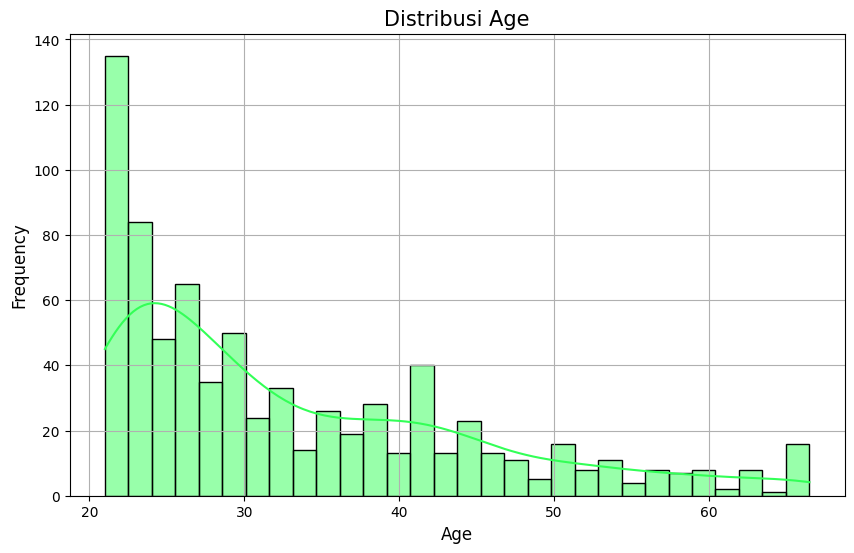

In [14]:
for i, feature in enumerate(list_numerik_features):
    plt.figure(figsize=(10, 6))
    # Pilihan palet warna
    colors = ['#FF5733', '#33FF57', '#3357FF']
    sns.histplot(df[feature], kde=True, color=colors[i % len(colors)], bins=30)
    plt.title(f'Distribusi {feature.capitalize()}', fontsize=15)
    plt.xlabel(feature.capitalize(), fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True)
    plt.show()

# 3. Modeling

Featur Scalling

In [15]:
# Standardisasi data (scaling)
scaler = StandardScaler()
df[list_numerik_features] = scaler.fit_transform(df[list_numerik_features])

Misahkan Data X dan Y

In [16]:
# Pisahkan fitur dan target
X = df.drop(columns=['Outcome'])
y = df['Outcome']

Membagi data training 80% dan Testing 20%

In [17]:
# Split dataset menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

In [18]:
X_train

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age
332,-0.848970,1.888647,1.586224,-0.619859,0.671220
111,1.245598,1.086521,0.266137,0.294614,1.101481
64,0.946374,-0.228966,0.095803,-0.703948,0.757272
742,-0.848970,-0.389392,-0.514559,-0.840594,-0.963775
101,-0.848970,0.958181,-0.855227,-0.980743,-0.963775
...,...,...,...,...,...
735,0.048702,-0.838582,0.464860,-0.612851,-0.447461
475,-1.148194,0.508990,-0.684893,-0.798549,2.220162
46,-0.848970,0.797755,-0.344225,0.368192,-0.361409
767,-0.848970,-0.902753,-0.244864,-0.504236,-0.877723


In [19]:
y_train

,Outcome
332,1
111,1
64,1
742,0
101,0
...,...
735,0
475,0
46,0
767,0


# Model Logistik Regresion

In [20]:
from sklearn.linear_model import LogisticRegression
LRModel=LogisticRegression(random_state=16)
LRModel.fit(X_train,y_train)

# Make predictions on the testing data
y_pred = LRModel.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy_LR = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Logistic Regression Model Accuracy:", accuracy_LR)

Logistic Regression Model Accuracy: 0.8051948051948052


# Model Decisiton Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier model with a maximum depth of 3
DTModel = DecisionTreeClassifier(max_depth=3, random_state=16)

# Fit the model to the training data
DTModel.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_dt = DTModel.predict(X_test)


In [23]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Print the accuracy
print("Decision Tree Model Accuracy:", accuracy_dt)

Decision Tree Model Accuracy: 0.7987012987012987


# Model Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Membuat model pengklasifikasi Random Forest dengan parameter sederhana
RFModel = RandomForestClassifier(n_estimators=100,  # Number of trees in the forest
                                 max_depth=5,       # Maximum depth of each tree
                                 random_state=16)   # For reproducible results

# Fit the model to the training data
RFModel.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = RFModel.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy_RF = accuracy_score(y_test, y_pred_rf)

# Print the accuracy
print("Random Forest Model Accuracy:", accuracy_RF)

Random Forest Model Accuracy: 0.8181818181818182


#Model SVM

In [26]:
# Model SVM (tanpa tuning awal)
svm_model = SVC(kernel='linear', random_state=16)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

In [27]:
# Evaluasi awal
accuracy = accuracy_score(y_test, y_pred)
print(f'Initial Accuracy: {accuracy:.2f}')

Initial Accuracy: 0.81


Pemilihan ALGORITMA SVM

# Confusion matrix, Cross Validation, Hyperparameter Tuning

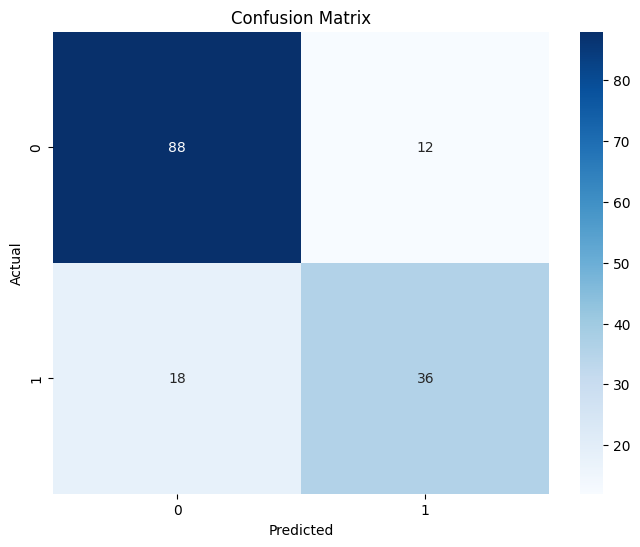

In [28]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [29]:
# Cross-validation
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", cv_scores.mean())

Cross-Validation Scores: [0.83739837 0.68292683 0.76422764 0.71544715 0.77868852]
Average Cross-Validation Score: 0.7557377049180328


# Evaluasi Metriks, AUC-ROC

In [30]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       100
           1       0.75      0.67      0.71        54

    accuracy                           0.81       154
   macro avg       0.79      0.77      0.78       154
weighted avg       0.80      0.81      0.80       154



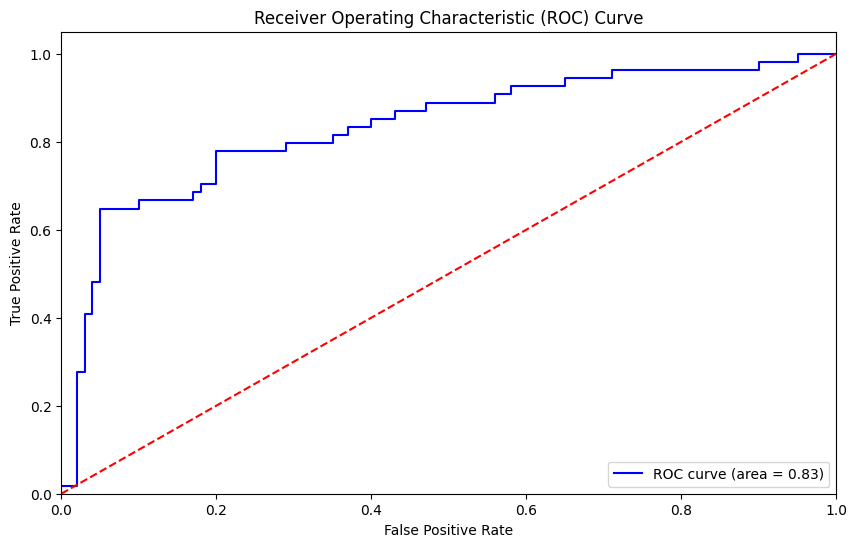

AUC: 0.83


In [31]:
from sklearn.metrics import roc_curve, auc

# Hitung probabilitas prediksi untuk kelas positif
y_scores = svm_model.decision_function(X_test)

# Hitung FPR dan TPR
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Hitung AUC
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Garis diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Tampilkan nilai AUC
print(f'AUC: {roc_auc:.2f}')


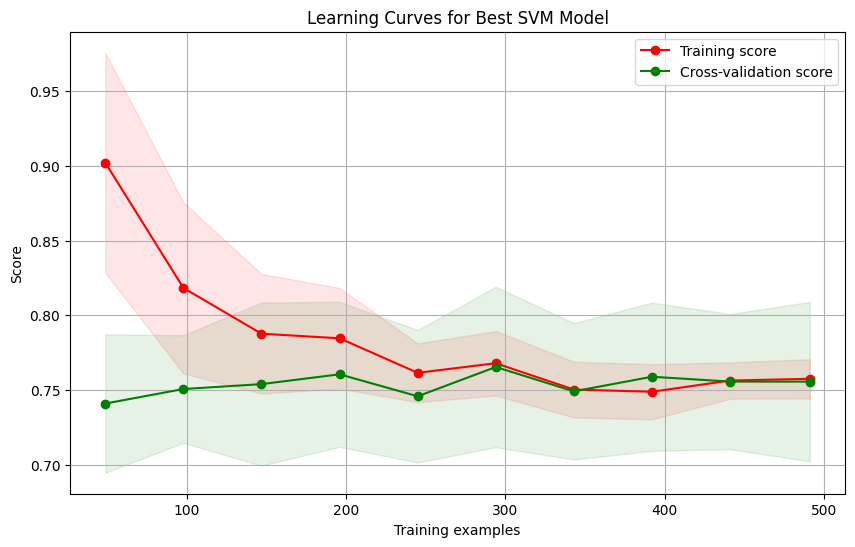

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define function to plot learning curves
def plot_learning_curves(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, n_jobs=-1
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r"
    )
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g"
    )
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.title("Learning Curves for Best SVM Model")
    plt.grid()
    plt.show()

# Gunakan svm_model (model terbaik Anda) untuk membuat learning curve
plot_learning_curves(svm_model, X_train, y_train)


# Uji Coba Model

In [33]:
input_data = (6, 148, 33.6, 0.627, 50)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

std_data = scaler.transform(input_data_reshape)
print(std_data)

prediction = svm_model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print('Pasien tidak terkena diabetes')
else :
    print('Pasien terkena diabetes')

[[0.64714967 0.86192556 0.20935933 0.58892732 1.44569096]]
[1]
Pasien terkena diabetes


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


# Save Model

In [34]:
import pickle

In [35]:
filename = 'diabetes_model.sav'  # Nama file untuk menyimpan model
pickle.dump(svm_model, open(filename, 'wb'))  # Menyimpan model dalam mode write binary

In [36]:
# Menyimpan scaler
filename = 'scaler.sav'
pickle.dump(scaler, open(filename, 'wb'))